# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

#### Additional Analysis

* Latitude versus Max Temperature - cities above the equator (0 degrees latitude) have lower temperatures (F) due to the tilt of the earth's rotation in relation to the sun and the ecliptic plane. These cities are in the winter season now. In contrast, cities below equator are in the summer season and have higher temps.
* Latitude versus Humidity (%) - no strong relationship between latitude and humidity. Since it is expressed as a % it probably refers to relative humidity (relative to the temperature in the air).
* Wind speed is affected by changes in temperature, which could be caused by certain weather conditions such as tornatoes, hurricanes, etc. Unless there was a specific weather pattern when the data was collected, the wind speed would be relatively low.
---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

#import datetime for set the day the data was requested
import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine random city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [3]:
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination and build list of cities
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Loop through the list of cities, make API request, and append desired results for the following weather metrics
city_name = []
cloudiness = []
country = []
curr_date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Counters for # of cities in each API request before code is paused - set is incremented by 1.
counter = 0
set_count = 1

# For loop will loop through all cities in list and see if the city data is available from openweathermap
for city in cities:    
    response = requests.get(query_url + city).json()
    if response["cod"] !=200:
        print(f"City not found. Skipping...")
    else:              
        print("Processing Record " + str(counter) + " of Set  " + str(set_count) + " | " + city)
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        curr_date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
       
    counter = counter + 1
    if counter > 50:
        set_count += 1
        counter = 0
        time.sleep(1) 
           

Processing Record 0 of Set  1 | kununurra
Processing Record 1 of Set  1 | iqaluit
Processing Record 2 of Set  1 | tsabong
Processing Record 3 of Set  1 | ushuaia
City not found. Skipping...
Processing Record 5 of Set  1 | sedan
Processing Record 6 of Set  1 | qaanaaq
Processing Record 7 of Set  1 | locri
Processing Record 8 of Set  1 | mataura
Processing Record 9 of Set  1 | jamestown
Processing Record 10 of Set  1 | college
Processing Record 11 of Set  1 | samana
Processing Record 12 of Set  1 | albany
Processing Record 13 of Set  1 | bluff
Processing Record 14 of Set  1 | carnarvon
Processing Record 15 of Set  1 | wainwright
Processing Record 16 of Set  1 | lovozero
Processing Record 17 of Set  1 | salalah
Processing Record 18 of Set  1 | touros
City not found. Skipping...
Processing Record 20 of Set  1 | tuktoyaktuk
Processing Record 21 of Set  1 | bambous virieux
Processing Record 22 of Set  1 | mareeba
City not found. Skipping...
Processing Record 24 of Set  1 | georgetown
Process

Processing Record 49 of Set  4 | harur
Processing Record 50 of Set  4 | tiksi
Processing Record 0 of Set  5 | shimoda
Processing Record 1 of Set  5 | pundaguitan
Processing Record 2 of Set  5 | sitka
Processing Record 3 of Set  5 | laguna
Processing Record 4 of Set  5 | tabuk
City not found. Skipping...
Processing Record 6 of Set  5 | chiredzi
Processing Record 7 of Set  5 | soubre
Processing Record 8 of Set  5 | isiro
Processing Record 9 of Set  5 | dondo
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of Set  5 | talnakh
Processing Record 13 of Set  5 | isangel
Processing Record 14 of Set  5 | puri
Processing Record 15 of Set  5 | mashhad
Processing Record 16 of Set  5 | puerto escondido
Processing Record 17 of Set  5 | high level
Processing Record 18 of Set  5 | kikwit
Processing Record 19 of Set  5 | bonavista
Processing Record 20 of Set  5 | poquoson
Processing Record 21 of Set  5 | tortosa
Processing Record 22 of Set  5 | the valley
Processing Record 

Processing Record 49 of Set  8 | antequera
Processing Record 50 of Set  8 | porto novo
Processing Record 0 of Set  9 | lavrentiya
Processing Record 1 of Set  9 | coihaique
Processing Record 2 of Set  9 | kholm
Processing Record 3 of Set  9 | roscrea
Processing Record 4 of Set  9 | chumikan
Processing Record 5 of Set  9 | santa rosa
Processing Record 6 of Set  9 | hunfeld
Processing Record 7 of Set  9 | turbat
Processing Record 8 of Set  9 | pasni
Processing Record 9 of Set  9 | datong
Processing Record 10 of Set  9 | aklavik
Processing Record 11 of Set  9 | batagay
Processing Record 12 of Set  9 | yar-sale
Processing Record 13 of Set  9 | paris
Processing Record 14 of Set  9 | fort-shevchenko
Processing Record 15 of Set  9 | marzuq
Processing Record 16 of Set  9 | massaguet
Processing Record 17 of Set  9 | oda
Processing Record 18 of Set  9 | chelno-vershiny
Processing Record 19 of Set  9 | cockburn town
Processing Record 20 of Set  9 | alghero
Processing Record 21 of Set  9 | lewistow

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create city_data_pd dataframe with additional columns (Humidity, Cloudiness, etc)
city_data_pd = {"city": city_name, "Cloudiness": cloudiness, "Country": country, "lat": lat, "Humidity": humidity, 
                "Lat": lat, "Lng": lon, "Max Temp": max_temp, "Wind Speed": wind_speed}
city_data_pd = pd.DataFrame(city_data_pd)
city_data_pd.dropna()

,city,Cloudiness,Country,lat,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kununurra,0,AU,-15.77,65,-15.77,128.74,80.60,14.99
1,Iqaluit,90,CA,63.75,62,63.75,-68.52,-13.01,4.70
2,Tsabong,0,BW,-26.02,29,-26.02,22.40,63.74,3.24
3,Ushuaia,75,AR,-54.81,80,-54.81,-68.31,44.60,28.86
4,Sedan,76,FR,49.70,100,49.70,4.94,37.40,1.12
5,Qaanaaq,0,GL,77.48,93,77.48,-69.36,-16.28,6.49
6,Locri,40,IT,38.24,71,38.24,16.26,50.00,3.58
7,Mataura,48,NZ,-46.19,64,-46.19,168.86,65.85,16.89
8,Jamestown,0,AU,-33.21,42,-33.21,138.60,74.22,7.49
9,College,0,US,64.86,69,64.86,-147.80,-32.44,2.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

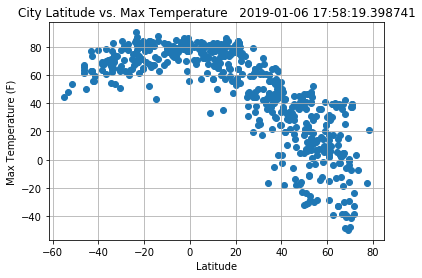

In [7]:
#Plot City Latitude vs. Max Temperature

# Will get current date and time data was collected
now = datetime.datetime.now()

# Add Title and labels for X and Y axis
plt.title("City Latitude vs. Max Temperature " + "  " + str(now))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Plot City Latitude vs. Max Temperature
plt.scatter(city_data_pd["lat"], city_data_pd["Max Temp"], marker="o")

# Save the figure
plt.savefig("LatMaxTempInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

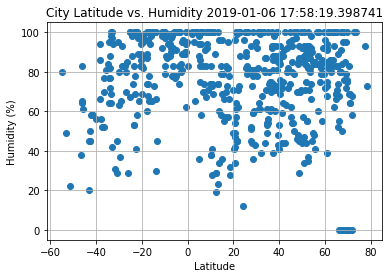

In [8]:
#Plot City Latitude vs. Humidity

# Add Title and labels for X and Y axis
plt.title("City Latitude vs. Humidity " + str(now))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Plot City Latitude vs. Max Temperature
plt.scatter(city_data_pd["lat"], city_data_pd["Humidity"], marker="o")

# Save the figure
plt.savefig("LatHumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

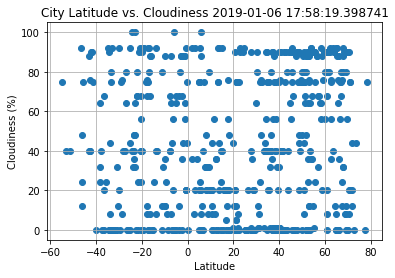

In [9]:
# Add Title and labels for X and Y axis
plt.title("City Latitude vs. Cloudiness " + str(now))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Plot City Latitude vs. Max Temperature
plt.scatter(city_data_pd["lat"], city_data_pd["Cloudiness"], marker="o")

# Save the figure
plt.savefig("LatCloudinessInWorldCities.png")

# Show plot
plt.show()     

#### Latitude vs. Wind Speed Plot

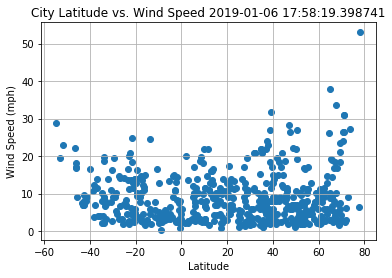

In [10]:
# Add Title and labels for X and Y axis
plt.title("City Latitude vs. Wind Speed " + str(now))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Plot City Latitude vs. Max Temperature
plt.scatter(city_data_pd["lat"], city_data_pd["Wind Speed"], marker="o")

# Save the figure
plt.savefig("LatWindSpeedInWorldCities.png")

# Show plot
plt.show()     

In [14]:
# Export city weather data into a .csv file
city_data_pd.to_csv("output_data_file.csv", index=False, header=False)
